# Amazon's Best Sellers 2025 - EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [2]:
best_sellers = pd.read_csv("data/Amazon_bestsellers_items_2025.csv")
best_sellers

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
0,0,1,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...,₹469.00,4.3,13324.0,https://www.amazon.in/dp/B073VKKNN9,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
1,1,2,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year...",₹370.00,4.4,2291.0,https://www.amazon.in/dp/B07PQZJ6Y8,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
2,2,3,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...,"₹1,799.00",4.5,388.0,https://www.amazon.in/dp/B0D1KL34JM,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
3,3,4,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit...",₹94.00,4.1,9630.0,https://www.amazon.in/dp/B07B9YYLGG,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
4,4,5,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...","₹1,699.00",4.4,5783.0,https://www.amazon.in/dp/B073VLGMZ4,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,96,B0DP7LBGM1,Microsoft Windows Server 2025 Standard Edition...,"$1,561.01",NaN,NaN,https://www.amazon.com.mx/dp/B0DP7LBGM1,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
995,995,97,B0CFZNMZW6,Photoshop Elements 2024 and Premiere Elements ...,"$3,067.45",4.0,82.0,https://www.amazon.com.mx/dp/B0CFZNMZW6,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
996,996,98,B09H2BRVWZ,Microsoft Office Hogar y Empresa 2021,"$5,999.00",4.9,12.0,https://www.amazon.com.mx/dp/B09H2BRVWZ,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
997,997,99,B0C55NKHKL,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D...",NaN,3.7,3.0,https://www.amazon.com.mx/dp/B0C55NKHKL,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2


#### Basic understanding of data

In [5]:
# basic info
best_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           999 non-null    int64  
 1   rank                 999 non-null    int64  
 2   asin                 999 non-null    object 
 3   product_title        999 non-null    object 
 4   product_price        945 non-null    object 
 5   product_star_rating  999 non-null    float64
 6   product_num_ratings  969 non-null    float64
 7   product_url          999 non-null    object 
 8   product_photo        999 non-null    object 
 9   rank_change_label    0 non-null      float64
 10  country              999 non-null    object 
 11  page                 999 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.8+ KB


In [6]:
# Drop duplicates
best_sellers = best_sellers.drop_duplicates()

# Handle missing values (example)
best_sellers['product_star_rating'].fillna(best_sellers['product_star_rating'].median(), inplace=True)
best_sellers['product_price'].fillna(best_sellers['product_price'].median(), inplace=True)
best_sellers['country'].fillna(best_sellers['country'].mode()[0], inplace=True)


TypeError: Cannot convert ['₹469.00' '₹370.00' '₹1,799.00' '₹94.00' '₹1,699.00' '₹599.00'
 '₹1,199.00' '₹745.00' '₹5,000.00' '₹599.00' '₹999.00' '₹225.00' '₹399.00'
 '₹454.00' '₹750.00' '₹899.00' '₹301.00' '₹1,869.00' '₹725.00' '₹199.00'
 '₹320.00' '₹5,599.00' '₹898.00' '₹1,699.00' '₹149.00' '₹469.00' '₹749.00'
 '₹2,292.00' '₹2,199.00' '₹500.00' '₹1,182.00' '₹7,299.00' '₹898.00'
 '₹2,869.00' '₹454.00' '₹939.00' '₹398.00' '₹1,299.00' '₹1,999.00'
 '₹839.00' '₹799.00' '₹1,999.00' '₹345.00' '₹330.00' '₹949.00' '₹280.00'
 '₹329.00' '₹10,000.00' '₹899.00' '₹725.00' '₹849.00' '₹299.00' '₹399.00'
 '₹253.00' '₹94.00' '₹7,738.00' '₹395.00' '₹2,399.00' '₹199.00'
 '₹1,899.00' '₹1,463.00' '₹669.00' '₹1,499.00' '₹395.00' '₹1,327.00'
 '₹879.00' '₹379.00' '₹949.00' '₹2,299.00' '₹379.00' '₹1,599.00' '₹999.00'
 '₹175.00' '₹398.00' '₹4,899.00' '₹2,679.00' '₹3,299.00' '₹500.00'
 '₹399.00' '₹179.00' '₹2,971.00' '₹500.00' '₹498.00' '₹499.00' '₹1,960.00'
 '₹330.00' '₹160.00' '₹347.00' '₹899.00' '₹301.00' '₹1,133.00' '₹2,199.00'
 '₹280.00' '₹7,279.00' '₹2,459.00' '₹616.00' '₹759.00' '₹266.00'
 '₹4,074.00' '₹199.00' '$149.99' '$79.99' '$29.99' '$15.00' '$119.99'
 '$19.99' '$129.99' '$114.99' '$24.99' '$69.99' '$24.99' '$59.99' '$99.99'
 '$41.95' '$99.00' '$9.99' '$189.99' '$57.00' '$21.99' '$69.99' '$119.99'
 '$2.99' '$24.99' '$29.99' '$104.99' '$44.99' '$19.99' '$41.99' '$249.99'
 '$29.00' '$49.99' '$29.99' '$29.99' '$129.99' '$146.18' '$17.99' '$12.99'
 '$39.99' '$29.95' '$29.99' '$56.69' '$239.88' '$63.95' '$39.99' '$29.99'
 '$229.99' '$19.99' '$39.99' '$19.99' '$32.99' '$19.99' '$59.99' '$39.99'
 '$34.99' '$144.99' '$24.99' '$74.99' '$78.99' nan '$51.99' '$26.99'
 '$99.99' '$14.99' nan '$74.99' '$63.99' '$14.99' '$59.00' '$69.99'
 '$39.99' '$39.99' '$39.99' '$99.99' '$19.99' '$69.99' '$69.99' '$119.99'
 '$59.99' '$13.88' '$49.99' '$29.99' '$24.99' '$84.99' nan '$84.99'
 '$64.39' '$56.99' '$374.99' '$16.00' '$74.99' '$39.99' '$13.99' '$59.89'
 '$49.99' '$11.99' '$39.99' '$11.99' '$119.99' '$29.95' '$169.99' '$34.99'
 '$44.99' '$29.99' '$109.99' '$24.99' '$38.00' '$75.00' '$34.99' '$40.00'
 '$189.99' '$24.99' '$29.00' '$26.99' '$14.99' '$19.99' '$144.99' '$54.95'
 '$39.99' '$24.99' '$144.97' '$259.99' '$49.99' '$59.95' '$49.99' '$21.95'
 '$74.99' '$49.99' '$39.99' '$24.99' '$24.99' '$24.95' '$100.00' '$99.99'
 '$215.00' '$24.99' '$39.99' '$31.48' '$87.99' '$19.99' '$19.77' '$40.00'
 '$319.99' '$40.00' '$29.55' '$598.00' '$29.99' '$180.00' '$310.00'
 '$21.98' '$11.69' '$59.99' '$67.98' '$24.99' '$201.64' '$239.99' '$51.59'
 '$89.95' '$39.99' '$24.99' '$184.84' '$69.29' '$59.00' '$38.07' '$24.99'
 '$129.98' '$22.99' '$114.99' nan '$16.99' '$99.95' '$21.00' '$199.90'
 '$200.00' '$34.46' '$96.36' '$24.99' '$24.97' '$84.99' '$29.71' '$34.85'
 '$311.88' '$34.99' '$39.95' '$39.97' '$38.21' '$14.97' '$66.67' '$44.99'
 '$97.20' '$155.88' '$56.62' '$21.96' '$150.00' '$19.93' '$96.02'
 '$799.00' '$12.40' '$21.95' '$99.00' '$155.00' '$135.00' '$90.00'
 '$165.64' '$85.00' '$30.95' '$163.14' '$160.00' '$15.99' '$112.16'
 '$28.99' '$30.95' '$23.89' '$64.95' '$119.99' '$244.71' '$378.00'
 '$69.99' '$50.00' '$69.99' '$320.77' '$219.00' '$25.99' '$94.95' '$28.99'
 nan '$19.00' nan '$444.73' '$74.95' '$129.00' '$59.30' '$62.95' '$30.35'
 '$107.99' '$54.95' '$33.95' '$69.00' '$31.95' '$64.95' '$39.99' '$29.95'
 '$59.99' '$43.00' '$897.49' nan '$49.99' '$9.99' nan '$326.28' '$99.99'
 '$6.99' '$36.95' '$93.88' '$75.00' '$249.00' nan '$31.95' '$415.10'
 '$17.99' '$49.98' '$149.99' nan nan '$193.59' '$179.00' nan nan nan
 '$60.95' '$319.00' '$84.18' '$356.60' nan '$89.95' '$198.42' nan '$17.00'
 '$29.99' nan nan '$159.95' '$129.00' '$179.00' nan '$319.00' '$51.00'
 '$97.53' '$62.95' nan nan '$8.95' nan '$66.00' nan nan '$98.88' nan
 '$210.98' nan '25,49\xa0€' '119,99\xa0€' '25,99\xa0€' '108,99\xa0€'
 '11,99\xa0€' '12,90\xa0€' '79,41\xa0€' '84,99\xa0€' '25,79\xa0€'
 '31,99\xa0€' '15,99\xa0€' '34,99\xa0€' '15,29\xa0€' '15,99\xa0€'
 '23,80\xa0€' '11,49\xa0€' '9,99\xa0€' '13,99\xa0€' '29,99\xa0€'
 '39,99\xa0€' '19,99\xa0€' '20,49\xa0€' '7,95\xa0€' '25,00\xa0€'
 '26,49\xa0€' '145,90\xa0€' '127,99\xa0€' '32,99\xa0€' '368,90\xa0€'
 '38,99\xa0€' '25,99\xa0€' '19,49\xa0€' '37,99\xa0€' '18,99\xa0€'
 '29,99\xa0€' '30,00\xa0€' '34,99\xa0€' '15,99\xa0€' '129,71\xa0€'
 '11,99\xa0€' '64,99\xa0€' '15,72\xa0€' '34,99\xa0€' '72,99\xa0€'
 '8,99\xa0€' nan '52,99\xa0€' '13,99\xa0€' '46,99\xa0€' '32,99\xa0€'
 '34,99\xa0€' '39,99\xa0€' '29,96\xa0€' '8,69\xa0€' '15,29\xa0€'
 '17,99\xa0€' '19,95\xa0€' '40,00\xa0€' '35,99\xa0€' '12,99\xa0€'
 '58,00\xa0€' '32,99\xa0€' '29,99\xa0€' nan '9,99\xa0€' '54,99\xa0€'
 '93,19\xa0€' '192,99\xa0€' '27,99\xa0€' '44,99\xa0€' '54,99\xa0€'
 '31,54\xa0€' '19,90\xa0€' '22,49\xa0€' '12,09\xa0€' '19,99\xa0€'
 '62,99\xa0€' '34,99\xa0€' '34,45\xa0€' '15,59\xa0€' '17,99\xa0€'
 '15,99\xa0€' '14,99\xa0€' '25,99\xa0€' '33,48\xa0€' '29,90\xa0€'
 '32,99\xa0€' '39,99\xa0€' '34,90\xa0€' '12,49\xa0€' '24,99\xa0€'
 '17,00\xa0€' '8,00\xa0€' '38,80\xa0€' '13,99\xa0€' '29,21\xa0€'
 '89,99\xa0€' '12,40\xa0€' '18,99\xa0€' '39,99\xa0€' '45,24\xa0€'
 '17,99\xa0€' '116,10\xa0€' '24,99\xa0€' '99,99\xa0€' '89,10\xa0€'
 '138,99\xa0€' '62,00\xa0€' '34,99\xa0€' '49,41\xa0€' '20,79\xa0€'
 '29,99\xa0€' '29,99\xa0€' '9,69\xa0€' '49,99\xa0€' '19,99\xa0€'
 '34,99\xa0€' '32,00\xa0€' '39,99\xa0€' '18,99\xa0€' '39,99\xa0€'
 '69,49\xa0€' '18,99\xa0€' '31,25\xa0€' '29,99\xa0€' '16,99\xa0€'
 '69,99\xa0€' '34,95\xa0€' '19,99\xa0€' '109,99\xa0€' '12,70\xa0€'
 '27,99\xa0€' '67,50\xa0€' '193,99\xa0€' '10,99\xa0€' '8,99\xa0€'
 '11,50\xa0€' '15,99\xa0€' '37,50\xa0€' '74,99\xa0€' '27,99\xa0€'
 '59,99\xa0€' '26,99\xa0€' '29,99\xa0€' '12,95\xa0€' '34,99\xa0€'
 '49,00\xa0€' '2,71\xa0€' '159,99\xa0€' '57,99\xa0€' '14,99\xa0€'
 '99,99\xa0€' '19,99\xa0€' '98,00\xa0€' '17,00\xa0€' '29,99\xa0€'
 '83,18\xa0€' '15,11\xa0€' '17,99\xa0€' '36,99\xa0€' '29,99\xa0€'
 '44,99\xa0€' '18,95\xa0€' '34,99\xa0€' '419,99\xa0€' '24,82\xa0€'
 '29,99\xa0€' '32,99\xa0€' '28,45\xa0€' '39,99\xa0€' '34,99\xa0€'
 '31,99\xa0€' '19,99\xa0€' '15,39\xa0€' '29,99\xa0€' '13,53\xa0€'
 '35,99\xa0€' '18,95\xa0€' '39,99\xa0€' '25,99\xa0€' '21,99\xa0€'
 '25,99\xa0€' '125,00\xa0€' '19,99\xa0€' '26,99\xa0€' '22,46\xa0€'
 '5,81\xa0€' '144,00\xa0€' '99,99\xa0€' '19,49\xa0€' '24,99\xa0€'
 '39,99\xa0€' '99,99\xa0€' '67,99\xa0€' '119,99\xa0€' '34,99\xa0€'
 '55,84\xa0€' '13,99\xa0€' '69,95\xa0€' '7,60\xa0€' '17,70\xa0€'
 '24,00\xa0€' '19,99\xa0€' '89,10\xa0€' '116,10\xa0€' '19,99\xa0€'
 '20,60\xa0€' '47,69\xa0€' '18,00\xa0€' '447,99\xa0€' '169,00\xa0€'
 '104,99\xa0€' '26,49\xa0€' '99,00\xa0€' '16,99\xa0€' '22,49\xa0€'
 '28,99\xa0€' '149,00\xa0€' '196,99\xa0€' '26,99\xa0€' '12,41\xa0€'
 '52,99\xa0€' '37,09\xa0€' '54,99\xa0€' '14,99\xa0€' '34,99\xa0€'
 '12,21\xa0€' '24,99\xa0€' '54,99\xa0€' '38,99\xa0€' '12,95\xa0€'
 '58,29\xa0€' '59,99\xa0€' '44,99\xa0€' '10,99\xa0€' '24,60\xa0€'
 '41,01\xa0€' '49,95\xa0€' '39,99\xa0€' '39,99\xa0€' '139,99\xa0€'
 '17,99\xa0€' '259,00\xa0€' '19,99\xa0€' '39,99\xa0€' '19,95\xa0€'
 '12,95\xa0€' '39,99\xa0€' '22,49\xa0€' '30,99\xa0€' '13,99\xa0€'
 '138,59\xa0€' '43,00\xa0€' '49,80\xa0€' '21,19\xa0€' '89,99\xa0€'
 '34,99\xa0€' '41,95\xa0€' '59,99\xa0€' '69,99\xa0€' nan '49,99\xa0€' nan
 '18,50\xa0€' '35,99\xa0€' '49,99\xa0€' '33,50\xa0€' '39,99\xa0€'
 '97,19\xa0€' '29,99\xa0€' '137,89\xa0€' '19,95\xa0€' '44,99\xa0€' nan
 '34,99\xa0€' '37,09\xa0€' '29,95\xa0€' '49,95\xa0€' '34,86\xa0€'
 '79,99\xa0€' '215,40\xa0€' '48,75\xa0€' '79,99\xa0€' '145,00\xa0€'
 '79,99\xa0€' '24,99\xa0€' '14,99\xa0€' '16,99\xa0€' '99,99\xa0€'
 '83,18\xa0€' '29,99\xa0€' '49,81\xa0€' '100,69\xa0€' '192,98\xa0€'
 '69,00\xa0€' '53,99\xa0€' '19,40\xa0€' '192,98\xa0€' '37,67\xa0€'
 '49,95\xa0€' '19,99\xa0€' '24,95\xa0€' '20,17\xa0€' '34,99\xa0€'
 '21,15\xa0€' '116,10\xa0€' '42,99\xa0€' '17,50\xa0€' '89,10\xa0€'
 '42,95\xa0€' '34,99\xa0€' '19,95\xa0€' '21,15\xa0€' '24,90\xa0€'
 '49,99\xa0€' '29,99\xa0€' '168,99\xa0€' '39,99\xa0€' '69,99\xa0€'
 '99,99\xa0€' '19,95\xa0€' '109,99\xa0€' '49,99\xa0€' '195,99\xa0€'
 '32,99\xa0€' '63,99\xa0€' '89,99\xa0€' '24,95\xa0€' '58,99\xa0€'
 '139,99\xa0€' '39,99\xa0€' '31,99\xa0€' '41,99\xa0€' nan '30,45\xa0€'
 '35,49\xa0€' '34,99\xa0€' '12,95\xa0€' '30,99\xa0€' nan '11,99\xa0€'
 '47,95\xa0€' '49,95\xa0€' '19,99\xa0€' '39,99\xa0€' '144,99\xa0€'
 '59,99\xa0€' '149,00\xa0€' '23,49\xa0€' '29,99\xa0€' '34,99\xa0€'
 '39,99\xa0€' '5,06\xa0€' '34,99\xa0€' '41,95\xa0€' '19,20\xa0€'
 '18,99\xa0€' '19,99\xa0€' '149,99\xa0€' '19,95\xa0€' '29,99\xa0€'
 '32,99\xa0€' '89,99\xa0€' '42,95\xa0€' '8,50\xa0€' '59,99\xa0€'
 '30,99\xa0€' '187,00\xa0€' '132,30\xa0€' '54,99\xa0€' '192,98\xa0€'
 '41,99\xa0€' '30,00\xa0€' '39,99\xa0€' '69,99\xa0€' '29,95\xa0€'
 '79,00\xa0€' '52,17\xa0€' '49,99\xa0€' '18,30\xa0€' '79,90\xa0€'
 '69,90\xa0€' '89,00\xa0€' '134,99\xa0€' '39,99\xa0€' '23,03\xa0€'
 '34,99\xa0€' nan '79,99\xa0€' '34,99\xa0€' '10,99\xa0€' '49,95\xa0€'
 '79,99\xa0€' '49,99\xa0€' '48,45\xa0€' '29,99\xa0€' '13,99\xa0€'
 '39,99\xa0€' '16,13\xa0€' '27,99\xa0€' '￥3,564' '￥31,023' '￥14,600'
 '￥13,900' '￥39,582' '￥2,970' '￥1,297' '￥10,780' '￥350' '￥3,970' '￥38,310'
 '￥28,390' '￥3,828' '￥1,450' '￥21,900' '￥2,189' '￥19,364' '￥2,673' '￥350'
 '￥20,336' '￥3,415' '￥2,520' nan '￥78,192' '￥9,000' '￥21,300' '￥5,940'
 '￥660' '￥8,585' '￥18,370' '￥6,900' '￥31,528' '￥5,418' '￥9,000' '￥13,693'
 '￥3,960' '￥18,336' '￥11,280' '￥17,424' '￥4,350' '￥462' '￥3,113' '￥11,800'
 '￥2,680' '￥24,909' '￥10,780' '￥3,436' '￥91' '￥13,600' '￥3,167' '￥25,800'
 '￥2,970' '￥44,800' nan '￥6,880' '￥26,380' '￥2,700' '￥2,380' '￥5,291' nan
 '￥21,485' '￥2,600' '￥4,155' '￥16,400' '￥3,354' '￥10,240' '￥1,621'
 '￥8,382' '￥14,280' '￥20,133' '￥27,400' '￥20,336' '￥12,964' '￥5,291'
 '￥6,490' '￥27,400' '￥15,400' '￥3,980' '￥1,185' '￥6,891' '￥15,800' '￥91'
 '￥2,970' '￥6,880' '￥22,851' '￥4,455' '￥6,980' '￥10,280' '￥14,273'
 '￥1,939' '￥2,280' '￥4,490' '￥11,609' '￥12,500' '￥9,900' '￥16,709'
 '￥4,950' '￥20,133' '￥9,400' '￥9,480' '$1,929.00' '$1,569.00' '$2,649.00'
 '$1,770.00' nan '$2,221.85' '$237.02' '$690.00' '$690.00' '$658.00'
 '$345.00' '$2,899.75' '$1,492.10' '$599.00' '$2,299.00' '$3,490.00'
 '$3,271.83' '$1,206.19' nan '$1,548.77' '$399.99' '$12,739.00'
 '$2,883.17' '$399.99' '$3,593.50' nan '$3,377.00' '$2,234.55' '$1,425.65'
 '$1,195.93' '$690.00' '$1,801.04' '$496.79' '$2,299.00' '$1,829.00'
 '$399.99' '$2,250.00' '$498.34' '$1,644.79' nan '$1,002.10' '$666.00'
 '$934.00' '$357.33' '$1,155.26' '$1,383.00' '$1,044.08' '$637.63' nan
 '$345.00' '$1,863.57' nan '$983.00' '$3,949.00' nan '$2,399.00' nan
 '$740.12' '$372.16' '$1,090.00' '$6,759.85' nan '$867.18' '$1,996.76'
 '$539.57' '$3,030.00' '$913.52' '$560.72' '$2,704.18' nan '$1,994.40' nan
 '$1,861.66' '$1,246.64' '$399.99' '$10,818.58' nan nan '$760.64'
 '$4,110.65' '$3,995.79' '$6,859.00' nan '$2,445.80' '$399.99' '$910.78'
 '$1,438.21' '$1,117.11' '$12,450.21' '$719.95' nan nan '$1,284.49'
 '$999.00' '$1,429.03' '$1,561.01' '$3,067.45' '$5,999.00' nan '$892.21'] to numeric

In [7]:
# basic stat
best_sellers.describe()

,Unnamed: 0,rank,product_star_rating,product_num_ratings,rank_change_label,page
count,999.000000,999.000000,999.000000,969.000000,0.0,999.000000
mean,499.000000,50.450450,4.142042,1312.546956,NaN,1.499499
std,288.530761,28.852421,0.488971,3025.241537,NaN,0.500250
min,0.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,249.500000,25.500000,3.900000,54.000000,NaN,1.000000
50%,499.000000,50.000000,4.200000,218.000000,NaN,1.000000
75%,748.500000,75.000000,4.400000,1009.000000,NaN,2.000000
max,998.000000,100.000000,5.000000,19189.000000,NaN,2.000000


In [6]:
# shape
best_sellers.shape

(999, 12)

#### Data cleaning 

In [8]:
# Clean product_price
best_sellers['product_price'] = best_sellers['product_price'].astype(str)

# Remove currency symbols and spaces
best_sellers['product_price'] = best_sellers['product_price'].replace(r'[₹$,€]', '', regex=True)

# Replace commas and weird spaces (like non-breaking)
best_sellers['product_price'] = best_sellers['product_price'].str.replace(',', '').str.strip()

# Convert to numeric
best_sellers['product_price'] = pd.to_numeric(best_sellers['product_price'], errors='coerce')

# Drop rows where price couldn't be converted
best_sellers = best_sellers.dropna(subset=['product_price'])

# checking for missing values
best_sellers.isnull().sum()

Unnamed: 0               0
rank                     0
asin                     0
product_title            0
product_price            0
product_star_rating      0
product_num_ratings     23
product_url              0
product_photo            0
rank_change_label      848
country                  0
page                     0
dtype: int64

In [9]:
# top 5 expensive peoducts
best_sellers.sort_values(by='product_price', ascending=False).head()


,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
608,608,10,B07NLL3CWD,Adobe Creative Cloud | Standard | 1 Anno | PC/...,44799.0,4.3,14.0,https://www.amazon.it/dp/B07NLL3CWD,https://images-eu.ssl-images-amazon.com/images...,NaN,IT,1
563,563,65,B00EV554A6,Adobe Creative Cloud All Apps | 1 an | PC/Mac ...,41999.0,4.0,87.0,https://www.amazon.fr/dp/B00EV554A6,https://images-eu.ssl-images-amazon.com/images...,NaN,FR,2
427,427,29,B00CSRZ7EC,Adobe Creative Cloud|Grafik Design|Gen KI||PC/...,36890.0,4.6,478.0,https://www.amazon.de/dp/B00CSRZ7EC,https://images-eu.ssl-images-amazon.com/images...,NaN,DE,1
641,641,43,B09XH39NQQ,Windows 11 │ Pro Edition │ Codice d'attivazion...,25900.0,3.7,12.0,https://www.amazon.it/dp/B09XH39NQQ,https://images-eu.ssl-images-amazon.com/images...,NaN,IT,1
679,679,81,B09V92RBB5,"Corel CorelDRAW Graphics Suite 2024, 1 anno, 1...",21540.0,4.0,3.0,https://www.amazon.it/dp/B09V92RBB5,https://images-eu.ssl-images-amazon.com/images...,NaN,IT,2


In [10]:
# average rating by country
best_sellers.groupby('country')['product_star_rating'].mean()

country
AU    4.235897
CA    4.053535
DE    4.310204
ES    3.965979
FR    4.062000
IN    4.313000
IT    4.214433
MX    4.154217
US    4.108333
Name: product_star_rating, dtype: float64

### Data Visulization

#### Distribution of product sale

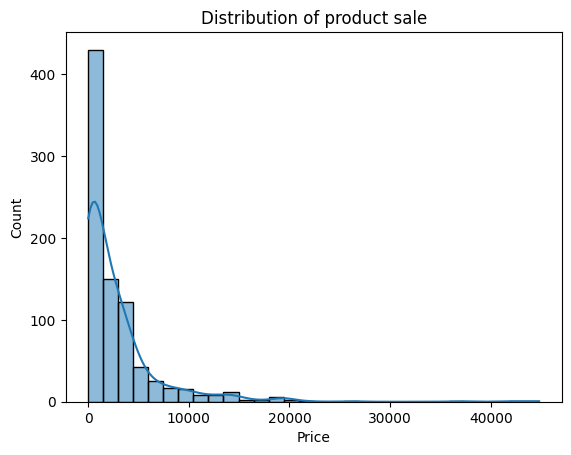

In [11]:
sns.histplot( best_sellers['product_price'].dropna(),bins=30, kde=True)
plt.title('Distribution of product sale')
plt.xlabel('Price')
plt.show()

#### Distribution of product star rating

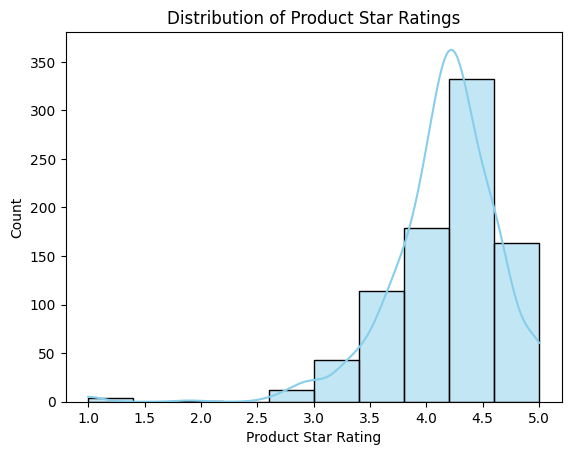

In [12]:
sns.histplot(best_sellers['product_star_rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Product Star Ratings")
plt.xlabel("Product Star Rating")
plt.ylabel("Count")
plt.show()


#### Ratings by country

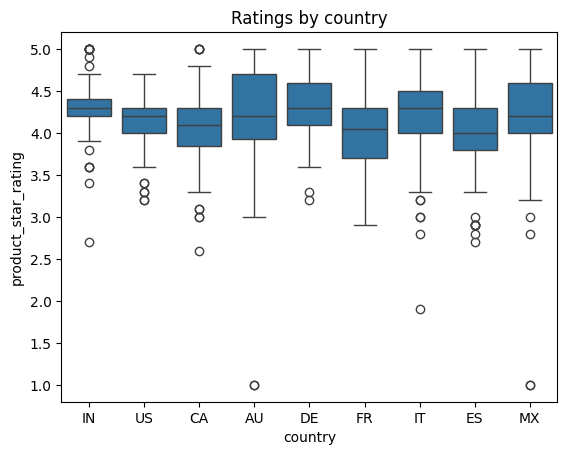

In [13]:
sns.boxplot(x='country', y='product_star_rating', data=best_sellers)
plt.title('Ratings by country')  
plt.show()


#### Scatter plot showing the relationship between product price and number of ratings, with colors representing the country of each product.

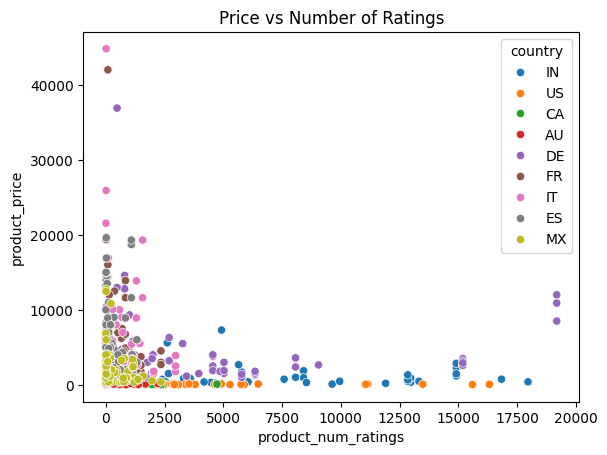

In [14]:
sns.scatterplot(x='product_num_ratings', y='product_price', hue='country', data=best_sellers)
plt.title("Price vs Number of Ratings")
plt.show()

# Price VS Rating

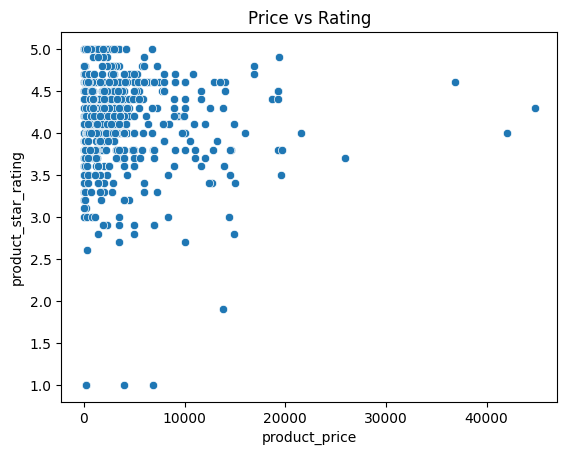

In [15]:
sns.scatterplot(x='product_price', y='product_star_rating', data=best_sellers)
plt.title("Price vs Rating")
plt.show()


#### Correlation Analysis

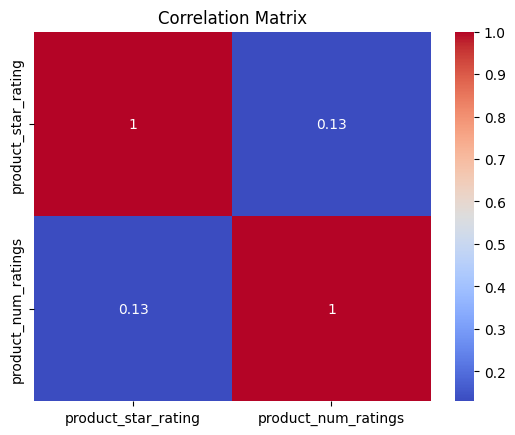

In [16]:
corr = best_sellers[['product_star_rating','product_num_ratings']].corr()

# Heatmap
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Most common country

/var/folders/9b/pfvkrsns3sx2_k1ncj82klqm0000gn/T/ipykernel_97172/1863343621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=best_sellers, order=best_sellers['country'].value_counts().index, palette='viridis')


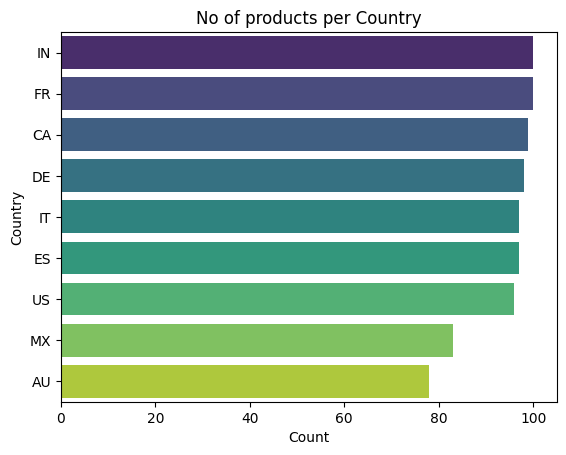

In [17]:
sns.countplot(y='country', data=best_sellers, order=best_sellers['country'].value_counts().index, palette='viridis')
plt.title('No of products per Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Bivariate analysis

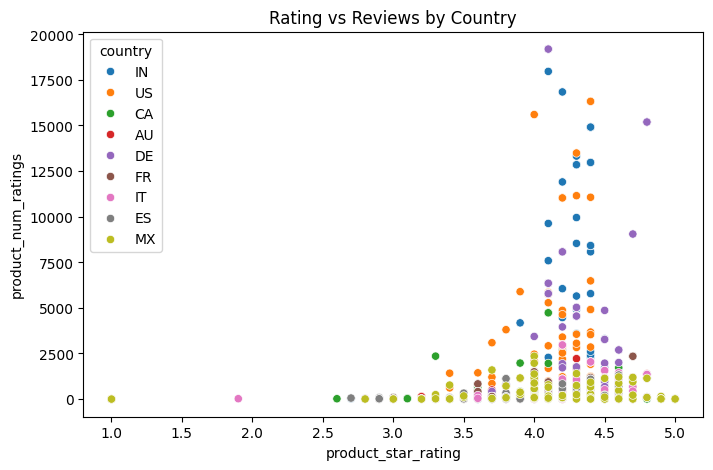

In [18]:
# Ratings vs Reviews
plt.figure(figsize=(8,5))
sns.scatterplot(data=best_sellers, x='product_star_rating', y='product_num_ratings', hue='country')
plt.title('Rating vs Reviews by Country')
plt.show()


#### Star rating by Country

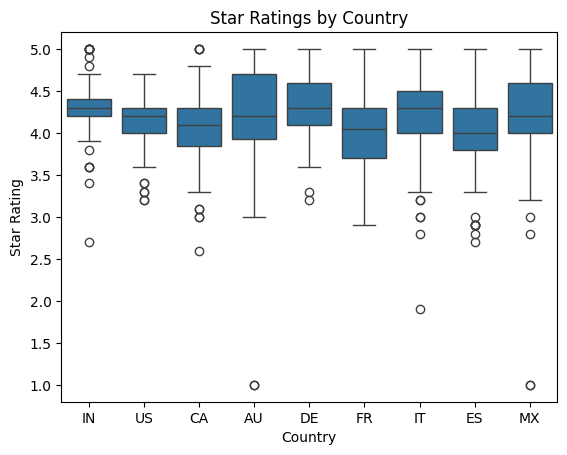

In [19]:
sns.boxplot(x='country', y='product_star_rating', data=best_sellers)
plt.title('Star Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Star Rating')
plt.show()

#### Top 10 Products by Number of Ratings

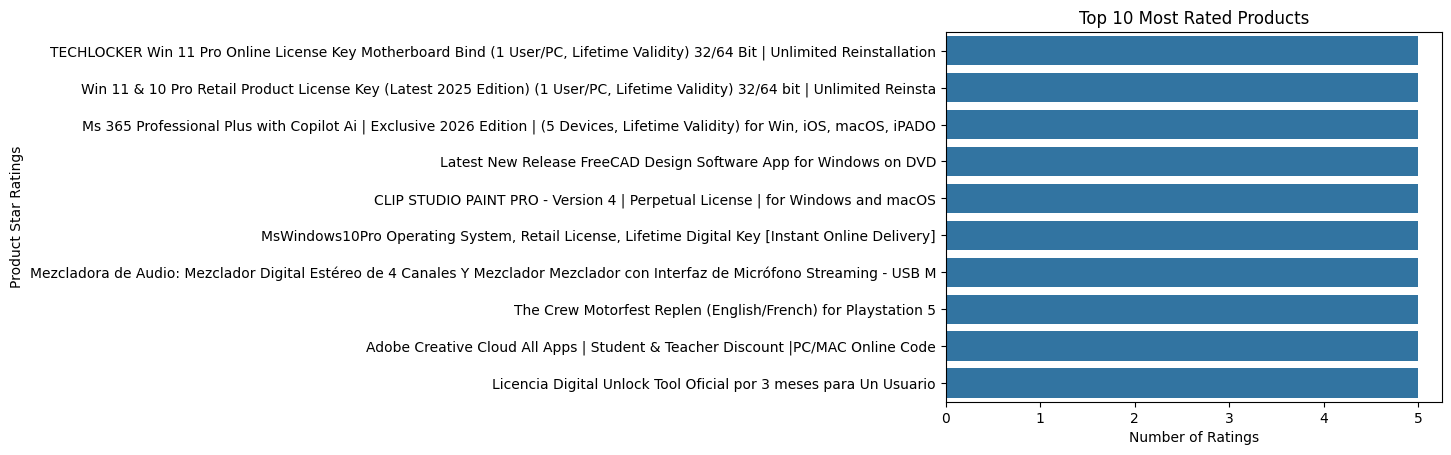

In [20]:
top10 = best_sellers.sort_values(by='product_star_rating', ascending=False).head(10)
sns.barplot(y='product_title', x='product_star_rating', data=top10)
plt.title('Top 10 Most Rated Products')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Star Ratings')
plt.show()

#### Top Rated Highest Products

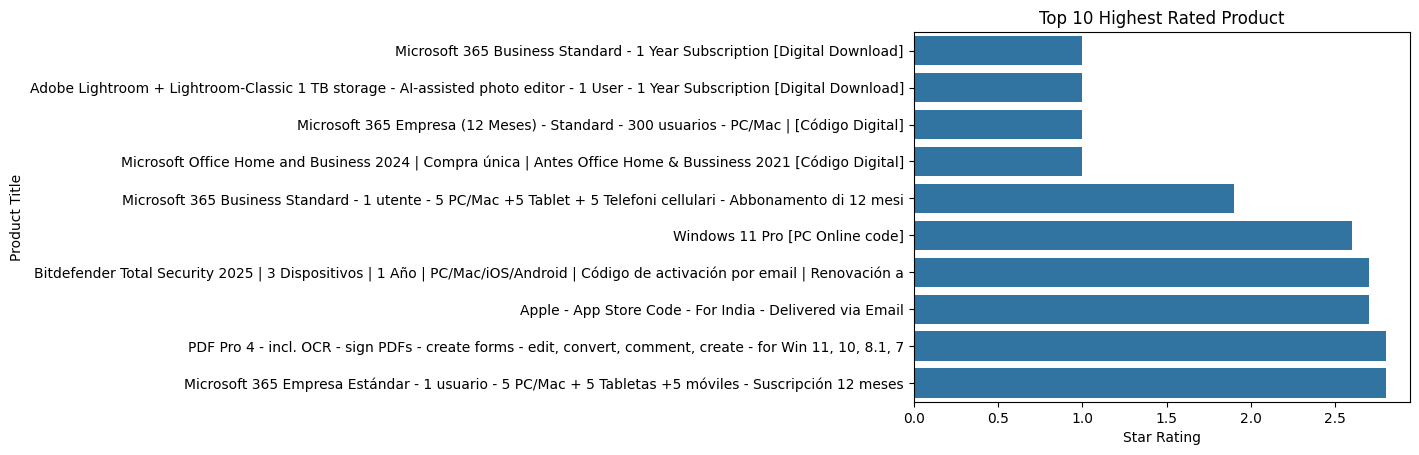

In [21]:
top_rated = best_sellers.sort_values('product_star_rating', ascending=True).head(10)
sns.barplot(y='product_title', x='product_star_rating',data=top_rated)
plt.title('Top 10 Highest Rated Product')
plt.xlabel('Star Rating')
plt.ylabel('Product Title')
plt.show()

### Pairplot -> Relationships among all numeric features

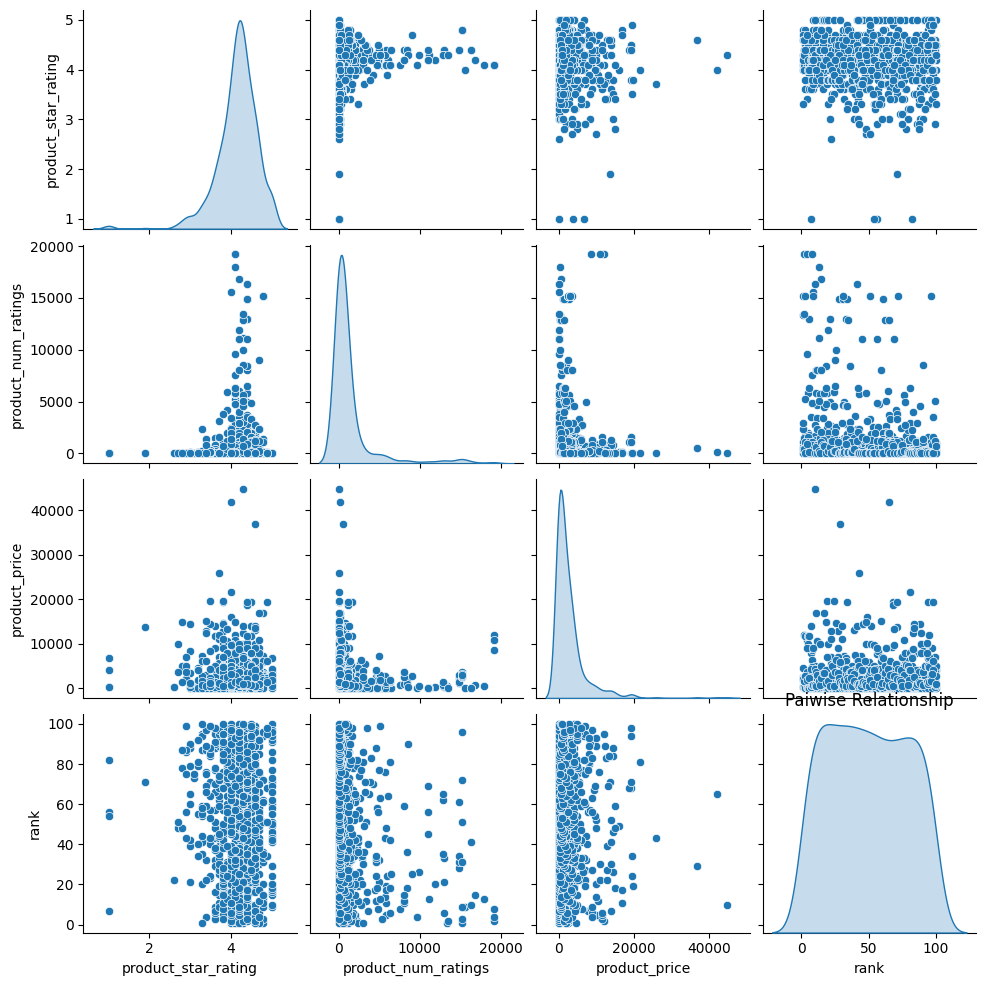

In [26]:
sns.pairplot(best_sellers[['product_star_rating', 'product_num_ratings', 'product_price', 'rank']], diag_kind='kde')
plt.title('Paiwise Relationship')
plt.show()

### Distribution comparison of Price vs Country

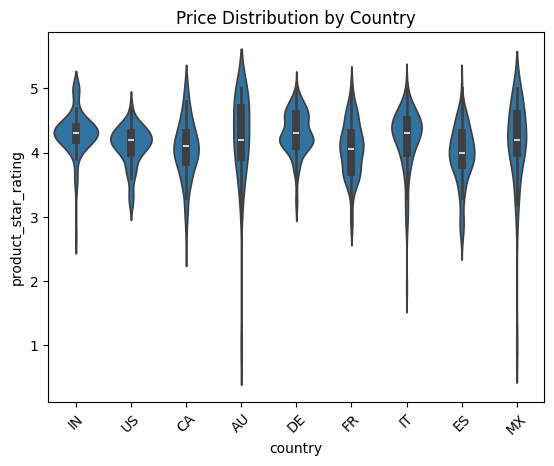

In [29]:
sns.violinplot(x='country', y='product_star_rating', data=best_sellers, inner='box')
plt.title('Price Distribution by Country')
plt.xticks(rotation=45)
plt.show()